In [5]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as st
from itertools import chain
flatten = chain.from_iterable
fig = plt.figure()
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
%matplotlib inline

In [6]:
event_data = pd.read_csv("EventStudy_EventDate.txt", header=0, sep='\t')
dataset = pd.read_csv("EventStudy.txt",header=0,sep="\t", decimal=",")
Mkt_data = pd.read_csv("F-F_Research_Data_Factors_daily.csv")
toremove = ["WM", "DYNEGYHOLDINGS", "MCIWORLDCOM","SP500","GLOBALCROSSING", "QWEST", "IMCLONESYS"]
dataset = dataset.drop(toremove, axis=1)
dataset = dataset.drop(0)
event_data = event_data.drop([1,6,7,11,12,21], axis=0)
dataset = dataset.reset_index().drop('index',axis=1)
dataset.set_index('Date').pct_change()

return_df = dataset.set_index('Date').pct_change().reset_index()
return_df['Mkt_RF'] = Mkt_data['Mkt-RF']
return_df['SMB'] = Mkt_data['SMB']
return_df['HML'] = Mkt_data['HML']
return_df['Rf'] = Mkt_data['RF']
return_df = return_df.set_index("Date").drop("2-1-1996")
return_df.head()

,SYBASE,MICROSTRATEGY,XEROX,LH,ENRON,ADELPHIA,PEREGRINE,CMSENERGY,ELPASO,HALLIBURTON,MERRILLLYNCH,MERCKCOMPANY,DUKEENERGY,BRISTOLMYERS,NICORDEAD,MIRANT,Mkt_RF,SMB,HML,Rf
Date,,,,,,,,,,,,,,,,,,,,
3-1-1996,-0.023564,NaN,-0.000889,NaN,-0.003311,0.037645,NaN,0.004171,NaN,-0.027853,0.019514,-0.013617,0.000000,-0.011680,-0.009139,NaN,-0.08,-0.25,0.66,0.019
4-1-1996,-0.027584,NaN,-0.021105,NaN,-0.006644,0.009070,NaN,-0.008308,NaN,-0.015626,-0.035890,0.005913,-0.007856,-0.007454,0.000000,NaN,-0.82,-0.33,0.25,0.019
5-1-1996,-0.003549,NaN,-0.011234,NaN,0.000000,0.009197,NaN,0.000000,NaN,0.007950,0.022333,-0.011761,0.005279,-0.004501,0.000000,NaN,-0.15,0.73,-0.17,0.019
8-1-1996,-0.007123,NaN,-0.001880,NaN,0.016722,-0.018020,NaN,0.008377,NaN,0.002620,-0.002426,0.013887,0.005247,0.012065,0.009223,NaN,0.24,-0.23,-0.06,0.019
9-1-1996,-0.071692,NaN,-0.000963,NaN,0.006578,0.018351,NaN,0.004154,NaN,-0.007867,-0.024330,-0.005871,0.002612,-0.005961,-0.013704,NaN,-1.67,0.19,1.17,0.019


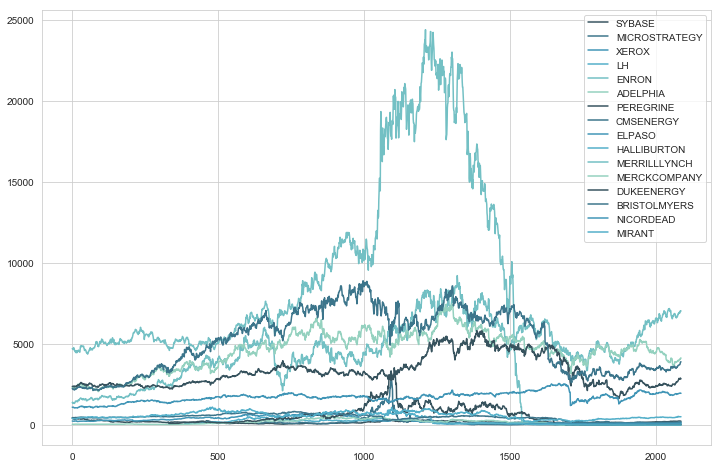

In [7]:
dataset.plot(figsize=(12,8))

In [8]:
event_window = 20
estimation_windows= 250
stocklist = return_df.columns.tolist()[:-4]

return_df.index = pd.to_datetime(return_df.index)

event_data["EventDate"] = pd.to_datetime(event_data["EventDate"]).dt.date
event_data = event_data.set_index("CompanyName")

In [9]:
stocklist

['SYBASE',
 'MICROSTRATEGY',
 'XEROX',
 'LH',
 'ENRON',
 'ADELPHIA',
 'PEREGRINE',
 'CMSENERGY',
 'ELPASO',
 'HALLIBURTON',
 'MERRILLLYNCH',
 'MERCKCOMPANY',
 'DUKEENERGY',
 'BRISTOLMYERS',
 'NICORDEAD',
 'MIRANT']

In [10]:
return_df.head()

,SYBASE,MICROSTRATEGY,XEROX,LH,ENRON,ADELPHIA,PEREGRINE,CMSENERGY,ELPASO,HALLIBURTON,MERRILLLYNCH,MERCKCOMPANY,DUKEENERGY,BRISTOLMYERS,NICORDEAD,MIRANT,Mkt_RF,SMB,HML,Rf
Date,,,,,,,,,,,,,,,,,,,,
1996-03-01,-0.023564,NaN,-0.000889,NaN,-0.003311,0.037645,NaN,0.004171,NaN,-0.027853,0.019514,-0.013617,0.000000,-0.011680,-0.009139,NaN,-0.08,-0.25,0.66,0.019
1996-04-01,-0.027584,NaN,-0.021105,NaN,-0.006644,0.009070,NaN,-0.008308,NaN,-0.015626,-0.035890,0.005913,-0.007856,-0.007454,0.000000,NaN,-0.82,-0.33,0.25,0.019
1996-05-01,-0.003549,NaN,-0.011234,NaN,0.000000,0.009197,NaN,0.000000,NaN,0.007950,0.022333,-0.011761,0.005279,-0.004501,0.000000,NaN,-0.15,0.73,-0.17,0.019
1996-08-01,-0.007123,NaN,-0.001880,NaN,0.016722,-0.018020,NaN,0.008377,NaN,0.002620,-0.002426,0.013887,0.005247,0.012065,0.009223,NaN,0.24,-0.23,-0.06,0.019
1996-09-01,-0.071692,NaN,-0.000963,NaN,0.006578,0.018351,NaN,0.004154,NaN,-0.007867,-0.024330,-0.005871,0.002612,-0.005961,-0.013704,NaN,-1.67,0.19,1.17,0.019


In [11]:
event_data

,EventDate
CompanyName,
SYBASE,1998-01-22
MICROSTRATEGY,2000-03-20
XEROX,2000-06-16
LH,2000-08-08
ENRON,2001-10-22
ADELPHIA,2002-03-27
PEREGRINE,2002-01-05
CMSENERGY,2002-10-05
ELPASO,2002-05-17


In [12]:
def eventstudy(returndata=return_df, eventdata=event_data, stocklist=stocklist):
    """
    returndata: is a dataframe with the market returns of the different firms
    eventdata: eventdata for the different firms
    stocklist: a list of the firms involved in the analysis
    
    Returns:
    abnreturn: a dictionary of the abnormal returns for each firm in their respective eventwindows -/+20
    """
    abnreturn ={}  # abnormal returns on the event window
    returndata = returndata.reset_index()
    Bse = []
    for stock in stocklist:
        
        eventindex = int(returndata[returndata['Date'] == str(eventdata.at[stock,'EventDate'])].index.values)
        print(eventindex)
        event_df = returndata.loc[eventindex-20: eventindex+20, ['Date',stock,'RF', 'Mkt_RF','SMB','HML' ]]
        estimation_df  = returndata.loc[eventindex-270: eventindex-21, ["Date",stock, "RF", "Mkt_RF","SMB","HML" ]]
        formula = stock + " - RF ~ Mkt_RF + SMB + HML"
        beta_Mkt = sm.OLS.from_formula(formula, data=estimation_df).fit().params["Mkt_RF"]
        beta_SMB = sm.OLS.from_formula(formula, data=estimation_df).fit().params["SMB"]
        beta_HML = sm.OLS.from_formula(formula, data=estimation_df).fit().params["HML"]
        
        alpha = sm.OLS.from_formula(formula, data=estimation_df).fit().params["Intercept"]
        
        standard_error = sm.OLS.from_formula(formula, data=estimation_df).fit().bse
        
        Bse.append(standard_error)
        print("{}, beta_Mkt= {}, beta_SMB = {}, beta_HML = {}, alpha= {}".format(stock, beta_Mkt, beta_SMB, beta_HML, alpha))
        
        #expected returns for each firm in the estimation window
        expectedreturn_eventwindow = ((event_df[['Mkt_RF']].values * beta_Mkt) + (event_df[['SMB']].values * 
                                       beta_SMB) + (event_df[['HML']].values * beta_HML ) + alpha)
        
        #abnormal returns on the event window - AR
       
        abnormal_return = event_df[stock].values - list(flatten(expectedreturn_eventwindow))
        abnreturn[stock] = abnormal_return
        
    abnormalreturns_df = pd.DataFrame(abnreturn)
    abnormalreturns_df.index = abnormalreturns_df.index-20
    return abnormalreturns_df

In [13]:
abnormalreturns_df = eventstudy(returndata=return_df, eventdata=event_data, stocklist=stocklist)
abnormalreturns_df

536
SYBASE, beta_Mkt= 0.004404890874036796, beta_SMB = 0.00751460824046012, beta_HML = 0.0005189599828595891, alpha= -0.0006437238359805753
1098


C:\Users\Jarvin\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


MICROSTRATEGY, beta_Mkt= 0.005024259273795099, beta_SMB = 0.0036923402213859704, beta_HML = 0.004956666627500385, alpha= 0.01160264911681676
1162
XEROX, beta_Mkt= -0.0002666623996716651, beta_SMB = 0.0007051129404077976, beta_HML = 0.0018441132788580119, alpha= -0.0022848386547735947
1199
LH, beta_Mkt= 0.0006691466180264926, beta_SMB = 0.006041951116327965, beta_HML = 0.011947891474361542, alpha= 0.004677577394817841
1513
ENRON, beta_Mkt= -0.00031281071356275766, beta_SMB = -0.0027523763473651184, beta_HML = -0.001471975756460196, alpha= -0.003471060109263063
1625
ADELPHIA, beta_Mkt= 0.0022370216030057686, beta_SMB = 0.0017992706539548243, beta_HML = 0.006985284685945605, alpha= -0.0022724652484591846
1650
PEREGRINE, beta_Mkt= 0.009777607542132912, beta_SMB = -0.006438321402548363, beta_HML = 0.011281605617083364, alpha= -0.0010070006207422203
1657
CMSENERGY, beta_Mkt= -0.0010252672929692125, beta_SMB = -0.0024387206776549063, beta_HML = -5.683106333702662e-05, alpha= -0.00103030128740

,ADELPHIA,BRISTOLMYERS,CMSENERGY,DUKEENERGY,ELPASO,ENRON,HALLIBURTON,LH,MERCKCOMPANY,MERRILLLYNCH,MICROSTRATEGY,MIRANT,NICORDEAD,PEREGRINE,SYBASE,XEROX
-20,0.009183,0.058356,0.007800,0.002387,-0.000750,-0.040777,0.001620,-0.015750,-0.015992,0.008188,0.000386,-0.038239,0.003542,-0.045179,-0.003979,-0.026773
-19,0.001383,-0.001503,-0.011365,0.024250,-0.000187,0.005376,0.003134,0.007014,-0.000861,0.010374,-0.070245,0.004292,-0.008649,-0.004219,0.001721,-0.011121
-18,0.055867,-0.021915,0.012664,0.038531,-0.002271,-0.064209,0.011091,-0.092336,-0.005475,0.004050,0.026741,0.054545,0.004847,-0.027472,0.031304,0.003595
-17,-0.000915,0.016220,0.014697,-0.004677,0.003718,0.008433,-0.060449,0.050558,0.020500,-0.009073,0.012427,-0.064354,-0.003326,0.014690,0.044843,0.008870
-16,0.032126,-0.005541,-0.003976,-0.054515,0.001028,0.082280,-0.069267,0.004686,-0.013476,-0.012380,-0.030989,-0.054520,-0.004022,-0.026589,-0.010899,0.009322
-15,0.045108,-0.011211,-0.020723,0.025374,-0.004574,0.074976,0.013040,-0.041987,0.014442,-0.010958,-0.012697,-0.136711,-0.034888,0.008943,0.006699,-0.021703
-14,-0.009148,-0.027586,-0.011194,-0.005006,-0.004259,0.055353,0.006976,0.004172,-0.031486,0.008541,-0.104064,0.183283,0.028888,-0.004336,-0.252429,0.004277
-13,0.028155,0.002049,0.007936,0.001198,-0.003260,0.098667,0.049692,-0.021866,-0.008726,0.006265,0.258729,0.004126,-0.024627,-0.035759,-0.081163,0.051839
-12,-0.007775,0.003326,-0.012945,-0.015659,0.001988,-0.007787,-0.017677,-0.020324,0.013415,-0.016829,0.004658,0.015952,-0.006331,0.026945,-0.018262,0.022073
-11,-0.023783,0.029067,-0.024519,-0.013707,-0.004220,-0.040351,-0.000452,-0.033138,-0.031210,-0.019614,0.040545,0.021577,-0.001280,0.118715,-0.031098,0.016311


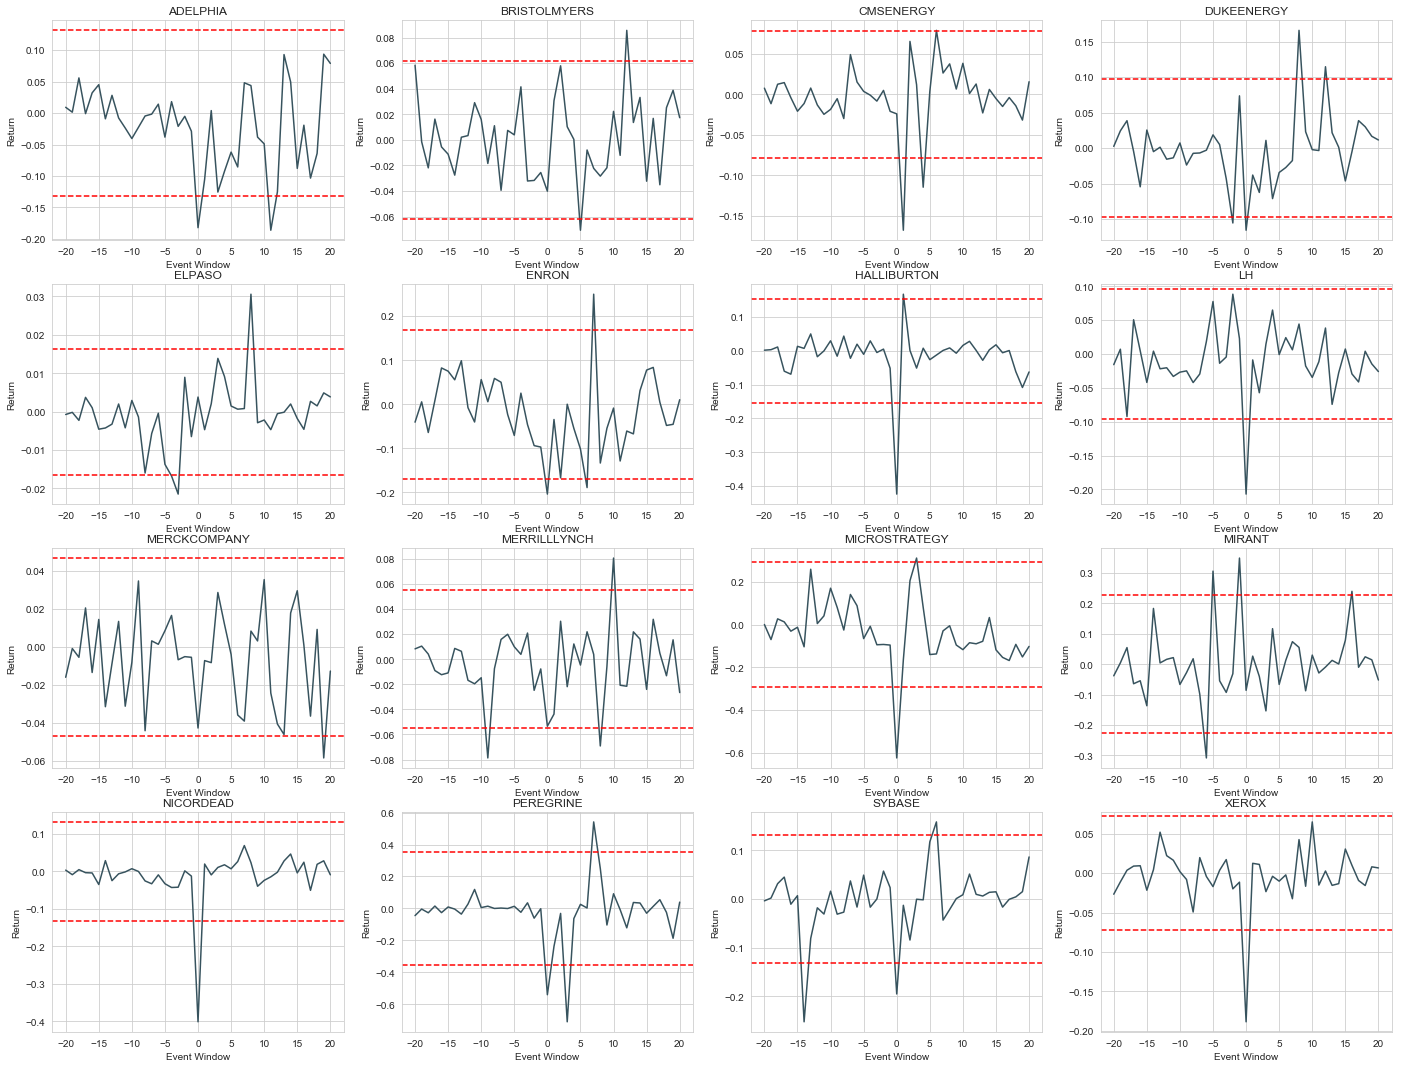

In [28]:
fig2 = plt.figure(figsize=(24,16))
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.subplots_adjust(bottom = .002)
    abnormalreturns_df[abnormalreturns_df.columns[i-1]].plot()
    plt.xlabel('Event Window')
    plt.ylabel('Return')
    plt.axhline(y=abnormalreturns_df.iloc[:,i-1].std()*1.96,color='red',linestyle='--')
    plt.axhline(y=abnormalreturns_df.iloc[:,i-1].std()*-1.96,color='red',linestyle='--')
    plt.title(abnormalreturns_df.columns[i-1])
fig2.savefig('results/abnormalret.png')

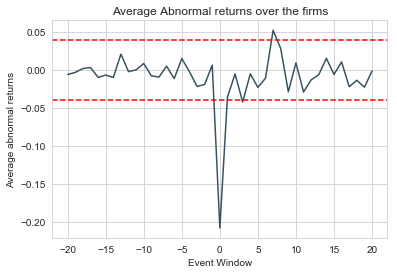

In [29]:
mean_AAR = abnormalreturns_df.mean(axis = 1)
var_AAR = (abnormalreturns_df.std())**2
var_matrix = pd.DataFrame(var_AAR)
var_matrix = var_matrix.T
var_AAR = sum(var_matrix.iloc[0])/16**2
Std_AAR = np.sqrt(var_AAR)
mean_AAR.plot()
plt.axhline(y=Std_AAR*1.96,color='red',linestyle='--')
plt.axhline(y=Std_AAR*-1.96,color='red',linestyle='--')
plt.title("Average Abnormal returns over the firms")
plt.xlabel("Event Window")
plt.ylabel("Average abnormal returns")
plt.savefig('results/averageabret.png')

In [16]:
stats = pd.DataFrame(mean_AAR, columns=['Mean AAR'])
stats['STD AAR'] = Std_AAR
stats['T-Test'] = mean_AAR / Std_AAR
stats['P-Value'] = st.t.cdf(stats['T-Test'],df=248)
display(stats)

,Mean AAR,STD AAR,T-Test,P-Value
-20,-0.005999,0.020281,-0.295781,3.838223e-01
-19,-0.003163,0.020281,-0.155961,4.380955e-01
-18,0.001847,0.020281,0.091086,5.362512e-01
-17,0.003260,0.020281,0.160761,5.637936e-01
-16,-0.009796,0.020281,-0.483015,3.147557e-01
-15,-0.006679,0.020281,-0.329351,3.710843e-01
-14,-0.009876,0.020281,-0.486978,3.133519e-01
-13,0.020828,0.020281,1.027014,8.472927e-01
-12,-0.002202,0.020281,-0.108583,4.568105e-01
-11,0.000178,0.020281,0.008760,5.034913e-01


In [17]:
def CAR_se(Abnormal_return=abnormalreturns_df, stock_list=stocklist):
    """
    To get the standard error of Cumulative Abnormal Return for each stock
    Input: the Abnormal Return datafram or matrix, a list of company names
    Output: a dataframe of cumulative standard error for each stock
    """
    residual_sigma_single = pd.DataFrame()
    residual_sigma_cum_single = pd.DataFrame()
    resi_single = []
    d = {}
    for x in stocklist:
        resistd = abnormalreturns_df[x].std()/16
        d.update({x:resistd})
        
    residual_sigma_single = pd.DataFrame(d,index=Abnormal_return.index)
    residual_sigma_cum_single = np.sqrt(residual_sigma_single.cumsum())
    se_cum_single = np.sqrt(((residual_sigma_cum_single**2)/16))
    
    return se_cum_single

In [18]:
se_cum_single = CAR_se()
se_cum_single

,ADELPHIA,BRISTOLMYERS,CMSENERGY,DUKEENERGY,ELPASO,ENRON,HALLIBURTON,LH,MERCKCOMPANY,MERRILLLYNCH,MICROSTRATEGY,MIRANT,NICORDEAD,PEREGRINE,SYBASE,XEROX
-20,0.016187,0.011093,0.012530,0.013913,0.005714,0.018377,0.017462,0.013808,0.009653,0.010468,0.024074,0.021296,0.016234,0.026516,0.016237,0.011993
-19,0.022892,0.015689,0.017721,0.019676,0.008081,0.025989,0.024695,0.019527,0.013651,0.014804,0.034045,0.030117,0.022958,0.037500,0.022963,0.016960
-18,0.028037,0.019214,0.021703,0.024099,0.009897,0.031830,0.030245,0.023916,0.016719,0.018132,0.041697,0.036886,0.028118,0.045928,0.028124,0.020772
-17,0.032374,0.022187,0.025061,0.027827,0.011428,0.036754,0.034924,0.027615,0.019306,0.020937,0.048147,0.042592,0.032468,0.053033,0.032475,0.023985
-16,0.036196,0.024806,0.028019,0.031111,0.012777,0.041092,0.039046,0.030875,0.021585,0.023408,0.053830,0.047620,0.036300,0.059292,0.036308,0.026816
-15,0.039650,0.027173,0.030693,0.034080,0.013997,0.045014,0.042773,0.033822,0.023645,0.025642,0.058968,0.052165,0.039765,0.064951,0.039773,0.029376
-14,0.042827,0.029351,0.033152,0.036811,0.015118,0.048621,0.046200,0.036532,0.025539,0.027697,0.063693,0.056345,0.042951,0.070155,0.042960,0.031729
-13,0.045784,0.031377,0.035441,0.039353,0.016162,0.051978,0.049390,0.039054,0.027303,0.029609,0.068091,0.060235,0.045917,0.074999,0.045926,0.033920
-12,0.048562,0.033280,0.037591,0.041740,0.017142,0.055131,0.052386,0.041423,0.028959,0.031405,0.072221,0.063889,0.048702,0.079549,0.048712,0.035978
-11,0.051189,0.035081,0.039624,0.043998,0.018070,0.058113,0.055220,0.043664,0.030525,0.033104,0.076128,0.067345,0.051337,0.083852,0.051347,0.037924


In [19]:
def CAAR_se(Abnormal_return=abnormalreturns_df, stock_list=stocklist):
    
    """
    To get the standard error of Cumulative Average Abnormal Return
    Input: the Abnormal Return datafram or matrix, a list of company names
    Output: a list of cumulative standard error
    """
    residual_sigma  = pd.DataFrame()
    resi = []
    d={}
    for x in stocklist:
        resistd = abnormalreturns_df[x].std()/16
        d.update({x:resistd})
        
    residual_sigma = pd.DataFrame(d,index=Abnormal_return.index)
    residual_sigma_cum = np.sqrt(residual_sigma.cumsum())
    se_cum = np.sqrt(((residual_sigma_cum**2)/16).mean(axis=1))
    
    return se_cum

In [20]:
se = CAAR_se(Abnormal_return=abnormalreturns_df, stock_list=stocklist)
se

-20    0.016224
-19    0.022944
-18    0.028101
-17    0.032448
-16    0.036278
-15    0.039741
-14    0.042925
-13    0.045889
-12    0.048673
-11    0.051305
-10    0.053810
-9     0.056202
-8     0.058497
-7     0.060705
-6     0.062836
-5     0.064897
-4     0.066894
-3     0.068833
-2     0.070720
-1     0.072557
 0     0.074349
 1     0.076098
 2     0.077808
 3     0.079482
 4     0.081121
 5     0.082727
 6     0.084303
 7     0.085850
 8     0.087370
 9     0.088864
 10    0.090332
 11    0.091778
 12    0.093201
 13    0.094602
 14    0.095984
 15    0.097345
 16    0.098688
 17    0.100013
 18    0.101320
 19    0.102611
 20    0.103886
dtype: float64

In [21]:
CAR_df = abnormalreturns_df.cumsum()

In [22]:
mean_CAAR = CAR_df.mean(axis = 1)
stats_CAAR = pd.DataFrame(mean_CAAR, columns=['Mean CAAR'])
stats_CAAR['STD CAAR'] = se
stats_CAAR['T-Test'] = mean_CAAR / se
stats_CAAR['P-Value'] = st.t.cdf(stats_CAAR['T-Test'],df=41-3)
display(stats_CAAR)

,Mean CAAR,STD CAAR,T-Test,P-Value
-20,-0.005999,0.016224,-0.369732,0.356817
-19,-0.009162,0.022944,-0.399293,0.345956
-18,-0.007314,0.028101,-0.260285,0.398025
-17,-0.004054,0.032448,-0.124936,0.450616
-16,-0.013850,0.036278,-0.381764,0.352382
-15,-0.020529,0.039741,-0.516575,0.304223
-14,-0.030405,0.042925,-0.708334,0.241530
-13,-0.009577,0.045889,-0.208699,0.417899
-12,-0.011779,0.048673,-0.242007,0.405038
-11,-0.011601,0.051305,-0.226125,0.411158


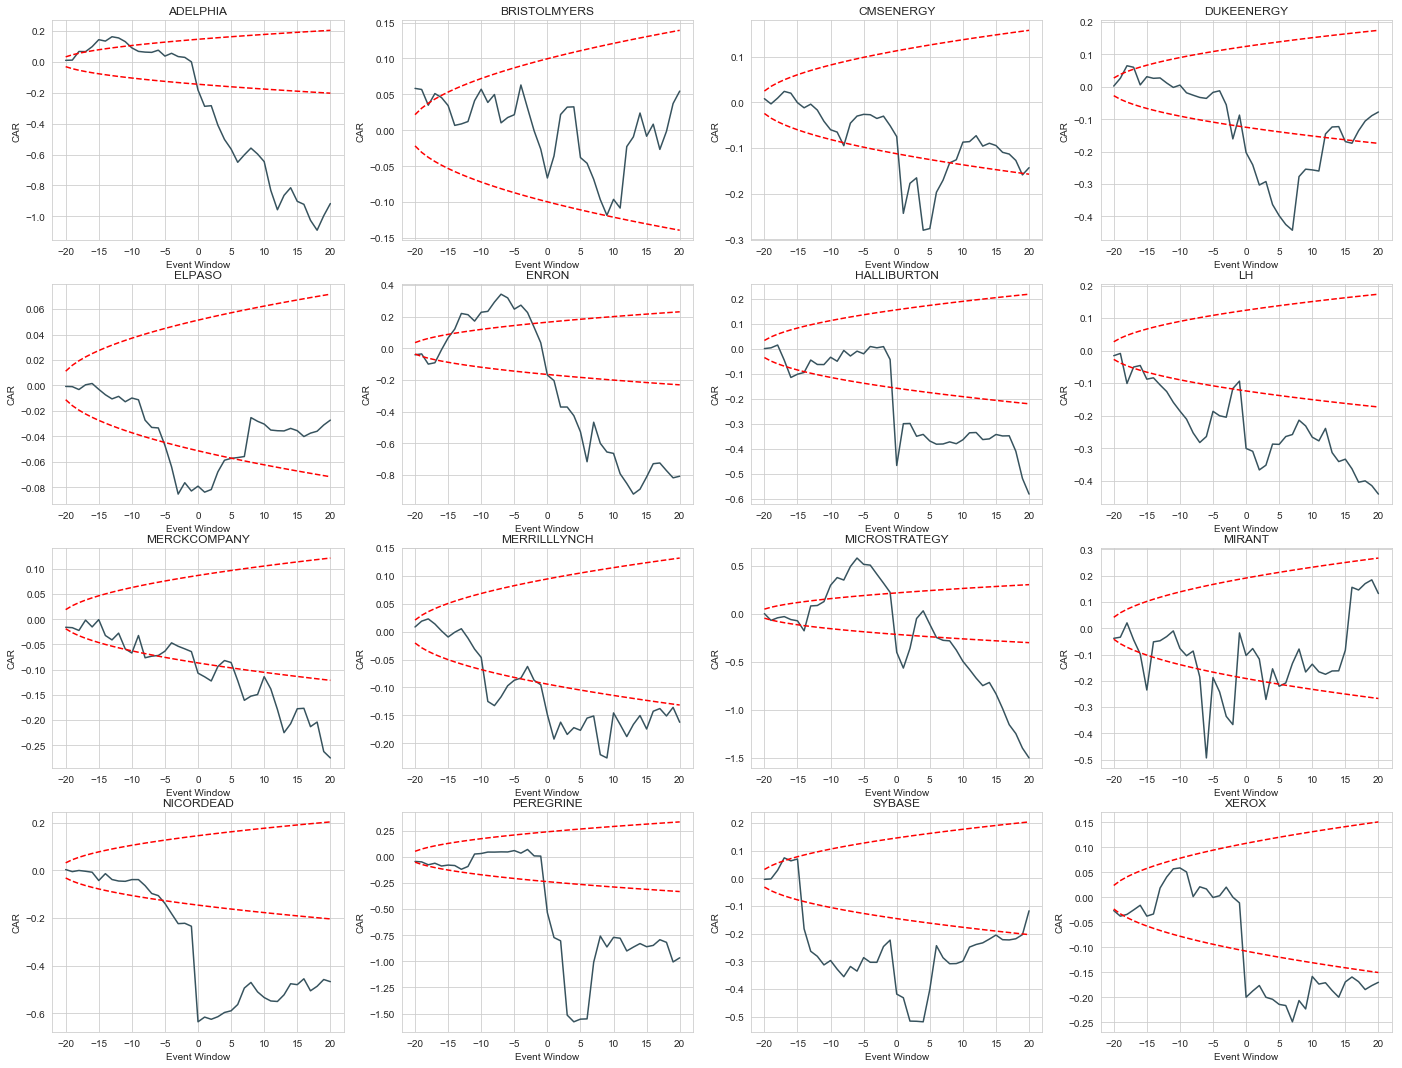

In [32]:
CAR_df = abnormalreturns_df.cumsum()
fig3 = plt.figure(figsize=(24,16))
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.subplots_adjust(bottom = .002)
    CAR_df[CAR_df.columns[i-1]].plot()
    plt.plot(se_cum_single.iloc[:,i-1]*1.96, color='red',linestyle='--')
    plt.plot(se_cum_single.iloc[:,i-1]*-1.96, color='red',linestyle='--')
    plt.xlabel('Event Window')
    plt.ylabel('CAR')
    plt.title(CAR_df.columns[i-1])
fig3.savefig('results/cumabnormalret.png')

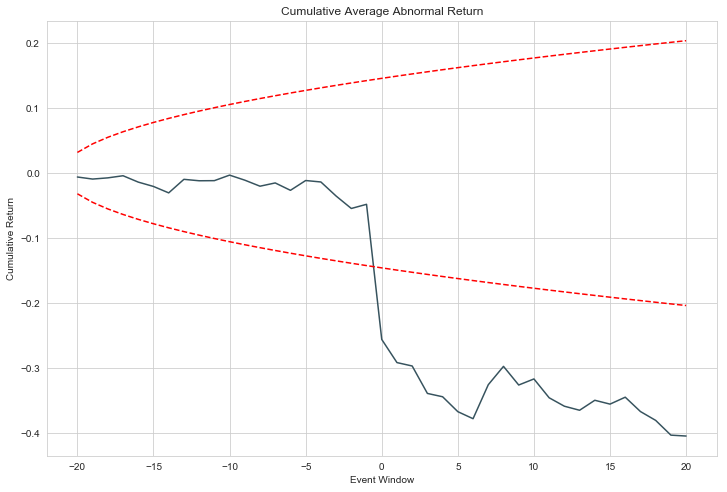

In [31]:
Var_AAR = ((CAR_df.mean(axis=1))**2)/16
Std_AAR = np.sqrt(Var_AAR)
# CAAR
CAAR = mean_AAR.cumsum()
# Plot CAAR
CAAR.plot(figsize=(12,8))
plt.xlabel("Event Window")
plt.plot(se*1.96, color='red',linestyle='--')
plt.plot(se*-1.96, color='red',linestyle='--')
plt.ylabel("Cumulative Return")
plt.title("Cumulative Average Abnormal Return")
plt.savefig('results/cumavgreturn.png')